##### Vitor Mazal Krauss - Relatório - Pêndulo

### Experimento 1: Sensor de luminosidade

O primeiro experimento foi feito com pêndulos com diferentes comprimentos de haste e um sensor de luminosidade posicionado no chão, abaixo do pêndulo. A luminosidade medida pelo sensor depende da posição do pêndulo. Conforme o pêndulo se move a posição de sua sombra no chão também muda, alterando a luminosidade que chega no sensor.

Começamos importando os arquivos.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g
import scipy
import scipy.interpolate
import scipy.stats

In [2]:
NUM_FILES = 7

In [3]:
path = os.path.join('C:\\', 'Users', 'vmk10', 'Desktop', 'C++', 'Pendulo')

data = [None]*NUM_FILES
lenghts = [None]*NUM_FILES
i = 0

for filename in os.listdir(path):
    lenghts[i] = float((filename.split('l')[1]).split('c')[0]) # Extrai do nome do arquivo o comprimento da haste
    filename = os.path.join(path, filename)
    data[i] = pd.read_csv(filename, delimiter=',')
    i += 1
del i

Uma vez importados os arquivos, seguimos com os gráficos da luminosidade em função do tempo para cada comprimento de haste.

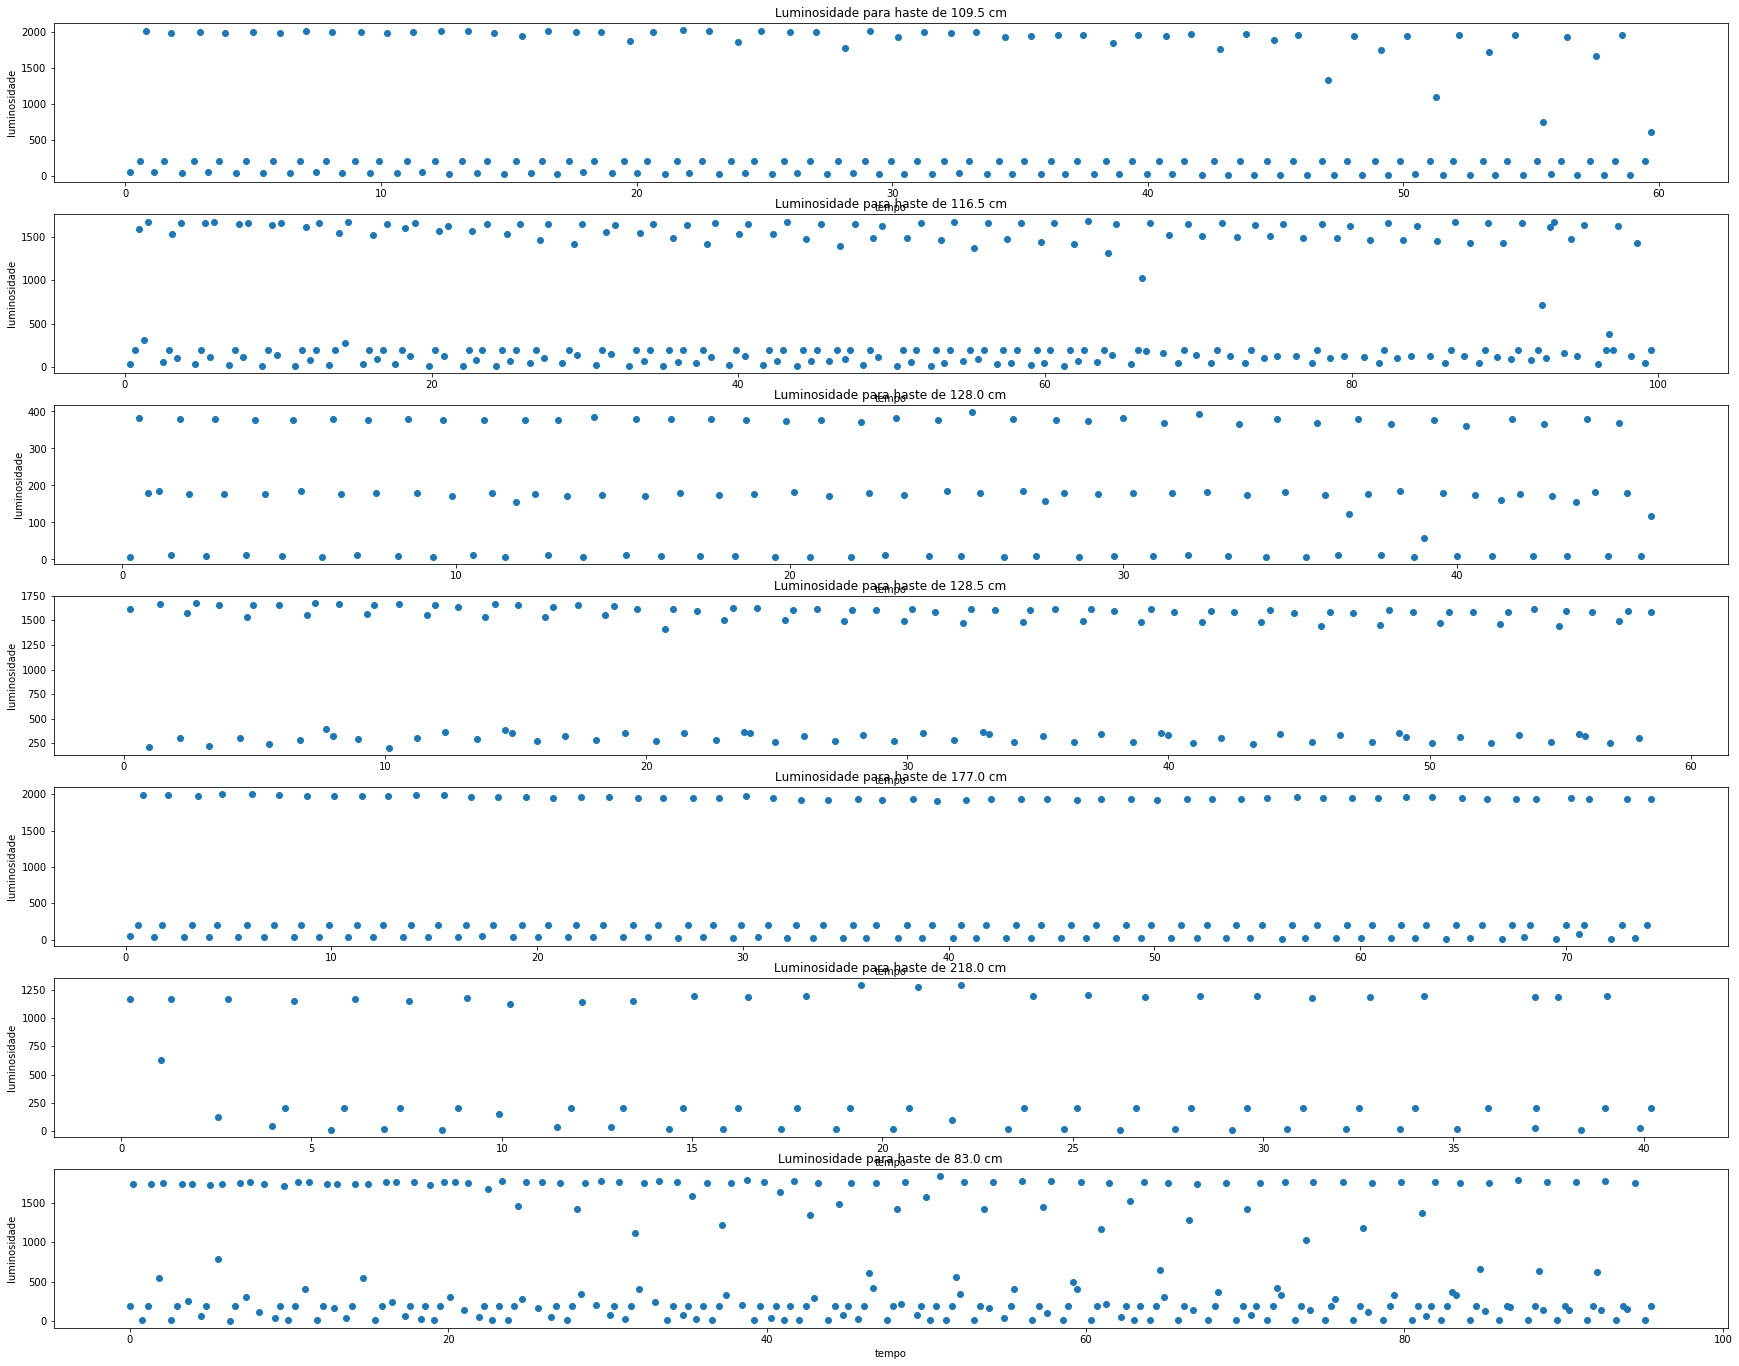

In [4]:
fig, vec = plt.subplots(NUM_FILES, figsize=(30, 24))
for i in range(NUM_FILES):
    vec[i].plot(np.array(data[i]['time']), np.array(data[i]['I']), 'o')
    vec[i].set_title("Luminosidade para haste de %1.1f cm" % (lenghts[i]))
    vec[i].set_xlabel("tempo")
    vec[i].set_ylabel("luminosidade")
plt.show()

Nosso objetivo inicial é estimar o período do pêndulo para cada comprimento de haste escolhido. Temos que, teoricamente, $T = 2\pi \sqrt{\frac{L}{g}}$. Calculemos então os períodos teoricos para cada comprimento de haste.

In [36]:
periodos_teoricos = [None]*len(lenghts)
for i in range(len(lenghts)):
    periodos_teoricos[i] = 2*np.pi*np.sqrt((lenghts[i]/100)/g)
    print("Periodo teorico para a haste de %f cm: %f segundos" %(l, periodos_teoricos[i]))
    

Periodo teorico para a haste de 83.000000 cm: 2.099552 segundos
Periodo teorico para a haste de 83.000000 cm: 2.165621 segundos
Periodo teorico para a haste de 83.000000 cm: 2.269993 segundos
Periodo teorico para a haste de 83.000000 cm: 2.274422 segundos
Periodo teorico para a haste de 83.000000 cm: 2.669354 segundos
Periodo teorico para a haste de 83.000000 cm: 2.962428 segundos
Periodo teorico para a haste de 83.000000 cm: 1.827926 segundos


Agora vamos analisar os dados coletados. Marcaremos os tempos no qual a luminosidade alcança um valor relativamente muito baixo, sinalizando que o pendulo está mais próximo do sensor de luminosidade, i.e, quando ele delimita um ângulo de $0$ radiano com a vertical. A diferença entre duas marcações é, portanto, meio período do pêndulo. Poderíamos também considerar os intervalos entre mínimos e máximos locais, porém isto aumenta a variabilidade da amostra, o que pode propagar erro.

Começaremos pelo cálculo da média destes meio períodos. Pela linearidade da média, multiplicaremos, finalmente, o valor obtido por $2$, a fim de obter o perído médio amostral.

In [6]:
def lista_peridos(tempo, luminosidade, floor, ceiling):
    "Identifica os minimos locais, marca seus respectivos tempos de ocorrencia. Retorna uma lista com a diferenca entre estes tempos"
    assert(len(tempo == len(luminosidade)))
    tempos = [None]*len(tempo)
    j = 0
    for i in range(len(tempo)):
        #if(luminosidade[i] < floor or luminosidade[i] > ceiling):
        if(luminosidade[i] < floor):
            tempos[j] = tempo[i]
            j += 1
    periodos = [None]*(j-1)
    for i in range(j-1):
        periodos[i] = tempos[i+1] - tempos[i]
    return np.array(periodos)

In [32]:
floor = [70, 150, 20, 360, 50, 200,70]
ceiling = [100, 100, 100, 100, 100, 100, 100]
periodos_amostrais = [None]*NUM_FILES

for i in range(NUM_FILES-1):
    periodos_amostrais[i] = 2*np.mean(lista_peridos(np.array(data[i]['time']), np.array(data[i]['I']), floor[i], ceiling[i]))
    print("Periodo amostral para a haste de %f cm: %f segundos" %(lenghts[i], periodos_amostrais[i]))

# Os dados para o pendulo de 83cm estao um pouco diferentes. Neste caso fica melhor calcular um período completo. 
periodos_amostrais[NUM_FILES-1] = np.mean(lista_peridos(np.array(data[NUM_FILES-1]['time']), np.array(data[NUM_FILES-1]['I']), floor[NUM_FILES-1], ceiling[i]))
print("Periodo amostral para a haste de %f cm: %f segundos" %(lenghts[NUM_FILES-1], periodos_amostrais[NUM_FILES-1]))

Periodo amostral para a haste de 109.500000 cm: 2.096321 segundos
Periodo amostral para a haste de 116.500000 cm: 2.325435 segundos
Periodo amostral para a haste de 128.000000 cm: 2.263600 segundos
Periodo amostral para a haste de 128.500000 cm: 2.194154 segundos
Periodo amostral para a haste de 177.000000 cm: 2.709481 segundos
Periodo amostral para a haste de 218.000000 cm: 2.986880 segundos
Periodo amostral para a haste de 83.000000 cm: 1.779151 segundos


Obs: no caso do pêndulo com haste de comprimento $83$ cm, os dados sugerem que o intervalos de tempo entre dois mínimos locais da luminosidade descrevem, na verdade, um período completo, por isso a pequena diferença no cálculo. Isso pode ocorrer se, por exemplo, o pêndulo tivesse uma aceleração angular lateral. Assim, sua sombra descreveria uma elipse no chão, de forma que ela passaria pelo sensor de luminosidade apenas uma vez por período.

Segue o gráfico dos períodos teóricos e amostrais em função do comprimento de haste.

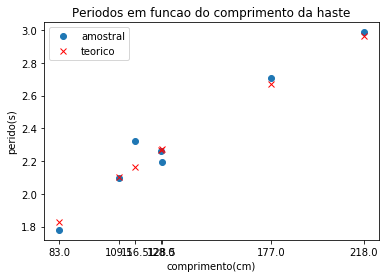

In [42]:
plt.plot(lenghts, periodos_amostrais, 'o', label='amostral')
plt.plot(lenghts, periodos_teoricos, 'xr', label='teorico' )
plt.legend()
plt.title("Periodos em funcao do comprimento da haste")
plt.xticks(lenghts)
plt.xlabel("comprimento(cm)")
plt.ylabel("perido(s)")
plt.show()

Suponhamos agora que quiséssemos estimar a constante $g$ da aceleração da gravidade na Terra. Usando novamente a relação $T = 2\pi \sqrt{\frac{L}{g}}$, concluimos que $g = (2\pi)^{2} \frac{L}{T^2}$. Lembramos que acima calculamos as médias amostrais do períodos $\mathbb{E}[T_L]$ respectivos a cada comprimento de haste $L$. Em geral, se $f$ é uma função e $X$ uma variável aleatória, então $f(\mathbb{E}(X)) \neq \mathbb{E}(f(X))$. Portanto, para cada $L$ fixo, vamos calcular $g^a_L = \mathbb{E}\big[ (2\pi)^2 \frac{L}{T_L^2} \big]$ e também $g^e_L = (2\pi)^2 \frac{L}{\mathbb{E}[T_L]^2} $ a fim de comparar as duas estimativas.

In [9]:
gel = [((2*np.pi)**2)*(lenghts[i]/100)/(periodos_amostrais[i])**2 for i in range(NUM_FILES)]

In [10]:
def g_a_l(periodos, lenght):
    ps = np.square(periodos)
    num = np.full(len(periodos), (lenght/100)*(2*np.pi)**2)
    return np.mean(np.divide(num, ps))

In [11]:
gal = [None]*NUM_FILES
for i in range(NUM_FILES-1):
    gal[i] = g_a_l(2*lista_peridos(np.array(data[i]['time']), np.array(data[i]['I']), floor[i], ceiling[i]), lenghts[i])
gal[NUM_FILES-1] = g_a_l(lista_peridos(np.array(data[NUM_FILES-1]['time']), np.array(data[NUM_FILES-1]['I']), floor[NUM_FILES-1], ceiling[NUM_FILES-1]), lenghts[NUM_FILES-1])

In [12]:
for i in range(NUM_FILES):
    print("ga_%1.2f = " %lenghts[i], gal[i], end='\t\t')
    print("ge_%1.2f = " %lenghts[i], gel[i])

ga_109.50 =  9.915512158707658		ge_109.50 =  9.836896648118715
ga_116.50 =  9.762391082112922		ge_116.50 =  8.505055320146617
ga_128.00 =  10.170533083606873		ge_128.00 =  9.86212120843118
ga_128.50 =  21.17573617220688		ge_128.50 =  10.53728468344395
ga_177.00 =  10.11310073112755		ge_177.00 =  9.518327177636047
ga_218.00 =  9.824001079665267		ge_218.00 =  9.646742377919765
ga_83.00 =  15.661683175965335		ge_83.00 =  10.351713378249967


Podemos ver que os $g_L^e$ fornecem aproximações melhores para a constante gravitacional $g\approx 9.8$. O erro maior apresentado pelas estimativas $g_L^a$ pode ser explicado pela propagação dos erros encontrados para cada período amostrado. De fato, os perídos amostrais, i.e, as médias amostrais dos perídos que obtivemos foram consideravelmente perto dos períodos teóricos, e por isso os $g_L^e$ ficaram próximos de $g$. Contudo, como veremos mais a frente, nossas amostras apresentaram uma variabilidade considerável: apesar da médias amostrais estarem próximas do valor teórico, individualmente, cada período observado está a uma certa distância desta média(ligado à ideia de variância), e por isso o estimador $g_L^e$ favorece a propagação destes erros.

Nós já sabemos que $L = \frac{g}{(2\pi)^2}T^2$. Porém, vamos supor que não conhecemos esta constante de proporcionalidade e vamos tentar estimá-la através da amostra. Vamos supor que para algum $c$ desconhecido, $L = cT^2$. Vamos estimar $c$ por mínimos quadrados. Seja $T_i$ o i-ésimo período amostral observado e $L_i$ o comprimento correspondente, então a função de perda quadrática é $p(c) = \sum_{i} (L_i - c{T_i}^2 )^2$ e queremos minimizá-la. 

Derivando, temos

$$ \frac{\partial p}{\partial c} = -2 \sum_{i} (L_i - c{T_i}^2 ){T_i}^2   $$

Daí, 
$$\frac{\partial p}{\partial c} = 0 \iff c = \frac{ \sum_{i} {L_i}{T_i^2} }{\sum_{i} T_i^4 } $$

Agora vamos usar os dados obtidos para estimar $c$ a partir da fórmula acima.

In [45]:
soma1 = 0
soma2 = 0
for i in range(NUM_FILES):
    soma1 += (periodos_amostrais[i]**2)*(lenghts[i]/100)
    soma2 += periodos_amostrais[i]**4
print("c = ", soma1/soma2)
print("g/(2pi)^2 = ", g/(2*np.pi)**2)

c =  0.2440112394849161
g/(2pi)^2 =  0.24840534639153292


Observe que a estimativa  $\hat{c} = 0.24401$ por mínimos quadrados para constante de proporcionalidade ficou muito próxima do valor real $c = \frac{g}{(2\pi)^2}$

##### Análise dos erros

Faremos agora uma análise estatística dos erros. Suponhamos que para um pêndulo de comprimento $L$, cada medição de um meio período é dado por $T_m = \frac{T_L}{2} + \epsilon$, onde $\epsilon \sim \mathcal{N}(0, \sigma^2)$, $\sigma^2$ é desconhecido e $T_L = 2\pi \sqrt{\frac{L}{g}}$ é o período teórico do pêndulo de comprimento $L$. A primeira análise a ser feita é um teste de normalidade dos erros. Faremos apenas para o pêndulo com haste de comprimento de $109.5$ cm.

p-value =  0.8009835884388833


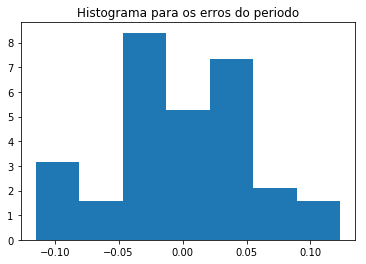

In [13]:
p = 0
lis = np.array(lista_peridos(np.array(data[p]['time']), np.array(data[p]['I']), floor[p], ceiling[p]))
lis_mean = np.full(len(lis), np.pi*np.sqrt((lenghts[p]/100)/g))
plt.hist(lis-lis_mean, bins='auto', density=True)
plt.title("Histograma para os erros do periodo")
print("p-value = ", scipy.stats.normaltest(lis-lis_mean)[1])

O p-value para o teste de normalidade foi de aproximadamente $0.8$. Portanto, mesmo para valores altos do nível de confiança $\alpha$(geralmente tomamos$\alpha = 0.05$), não rejeitamos a hipótese de que $\epsilon \sim \mathcal{N}$. 

Suponha agora que cada medição de um período(inteiro) do pêndulo de comprimento $L$ é $T_L^i \sim \mathcal{N}(\mu_L, \sigma_L^2)$, onde $\mu_L$ e $\sigma_L$ são desconhecidos. Podemos estimar $\mu_L$ e $\sigma_L$ pelos estimadores $\bar{T_L} = \frac{ \sum_{i=1}^{n} T_L^i }{n}$ e $\sigma_L' = \Big[ \frac{ \sum_{i=1}^{n} (T_L^i - \bar{T_L})^2 }{n-1} \Big]^{\frac{1}{2}}$. 

Sabemos que $$\frac{\sqrt{n}( \bar{T_L} - \mu_L)}{\sigma_L'}$$ tem distribuição t-Student com $n-1$ graus de liberdade. Com isso, podemos construir intervalos de confiança para $\mu_L$ e testar a hipótese $H_0: \mu_L = T_L$ contra $H_1:\mu_L \neq T_L$ para um nível de confiança $\alpha \in [0,1]$. Seja $t_{n-1}$ a função de probabilidade acumulada da distribuição t-Student com $n-1$ graus de liberdade. O intervalo de confiança para $\mu_L$ com nível de confiança $\alpha$ é

$$ I = \Bigg( \bar{T_L} - t_{n-1}^{-1}\Big(\frac{1+\alpha}{2}\Big)\frac{\sigma_L'}{\sqrt{n}}, \bar{T_L} + t_{n-1}^{-1}\Big(\frac{1+\alpha}{2}\Big)\frac{\sigma_L'}{\sqrt{n}} \Bigg)  $$

Se $\mu_L \in I$, então não rejeitamos a hipótese $H_0: \mu_L$ = $T_L$, caso contrário rejeitamos $H_0$.

Vamos agora então calcular os intervalos de confiança e realizar os testes de hipótese para as amostras do experimento com nível de confiança $\alpha = 0.05$

In [14]:
def confidence(periods, mean, alpha):
    periods = np.array(periods)
    mu = np.mean(periods)
    sigma = np.std(periods, ddof=1)
    n = len(periods)
    a = mu - (scipy.stats.t.ppf((1+alpha)/2, n-1)*sigma)/np.sqrt(n)
    b = mu + (scipy.stats.t.ppf((1+alpha)/2, n-1)*sigma)/np.sqrt(n)
    print("O intervalo de confianca %1.2f para mu é (%f, %f)" %(alpha, a,b))
    if(a < mean and mean < b): print("Nao rejeitamos a hipotese H_0: mu_l = T_l")
    else: print("Rejeitamos a hipotese H_0: mu_l = T_l")

In [15]:
weights = [2, 2, 2, 2, 2, 2, 1]
for i in range(NUM_FILES):
    print("Para o comprimento %1.2f" %lenghts[i])
    confidence(weights[i]*np.array(lista_peridos(np.array(data[i]['time']), np.array(data[i]['I']), floor[i], ceiling[p])), 2*np.pi*np.sqrt((lenghts[i]/100)/g) , 0.95)
    print("\n")

Para o comprimento 109.50
O intervalo de confianca 0.95 para mu é (2.067071, 2.125571)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 116.50
O intervalo de confianca 0.95 para mu é (2.180471, 2.470399)
Rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 128.00
O intervalo de confianca 0.95 para mu é (2.189843, 2.337357)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 128.50
O intervalo de confianca 0.95 para mu é (2.036620, 2.351688)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 177.00
O intervalo de confianca 0.95 para mu é (2.581444, 2.837519)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 218.00
O intervalo de confianca 0.95 para mu é (2.878765, 3.094995)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 83.00
O intervalo de confianca 0.95 para mu é (1.612419, 1.945883)
Nao rejeitamos a hipotese H_0: mu_l = T_l




Observe que, para o nível de confiança $\alpha = 0.95$, apenas para o pêndulo com haste de comprimento $116$ cm nós recusamos a hipótese $\mu_L = T_L$. Em todos os outros casos, os dados não nos levaram a rejeitar que $\mu_L = T_L$ e os intervalos de confiança construídos contiveram os perído teórico $T_L$.

### Experimento 2: Sensor de proximidade

Agora vamos fazer uma análise semelhante. Contudo, desta vez o experimento e a medição dos períodos são um pouco diferentes. Agora temos os dados de um sensor de proximidade, que 'marca' os tempos em que a luminonisade atinge $0$ ou $5$: $0$ indica que o pêndulo está o mais próximo do sensor, enquanto $5$ o mais distante. Logo o intervalo de tempo entre um $0$ e um $5$ significa $\frac{1}{4}$ de período. 

In [16]:
#Importar arquivos
path_p = os.path.join('C:\\', 'Users', 'vmk10', 'Desktop', 'C++', 'Pendulo2')

NUM_FILES_P = 3

data_p = [None]*NUM_FILES_P
lenghts_p = [None]*NUM_FILES_P
i = 0

for filename in os.listdir(path_p):
    lenghts_p[i] = float((filename.split('_')[1]).split('c')[0]) # Extrai do nome do arquivo o comprimento da haste
    filename = os.path.join(path_p, filename)
    data_p[i] = pd.read_csv(filename, delimiter=',')
    i += 1
del i

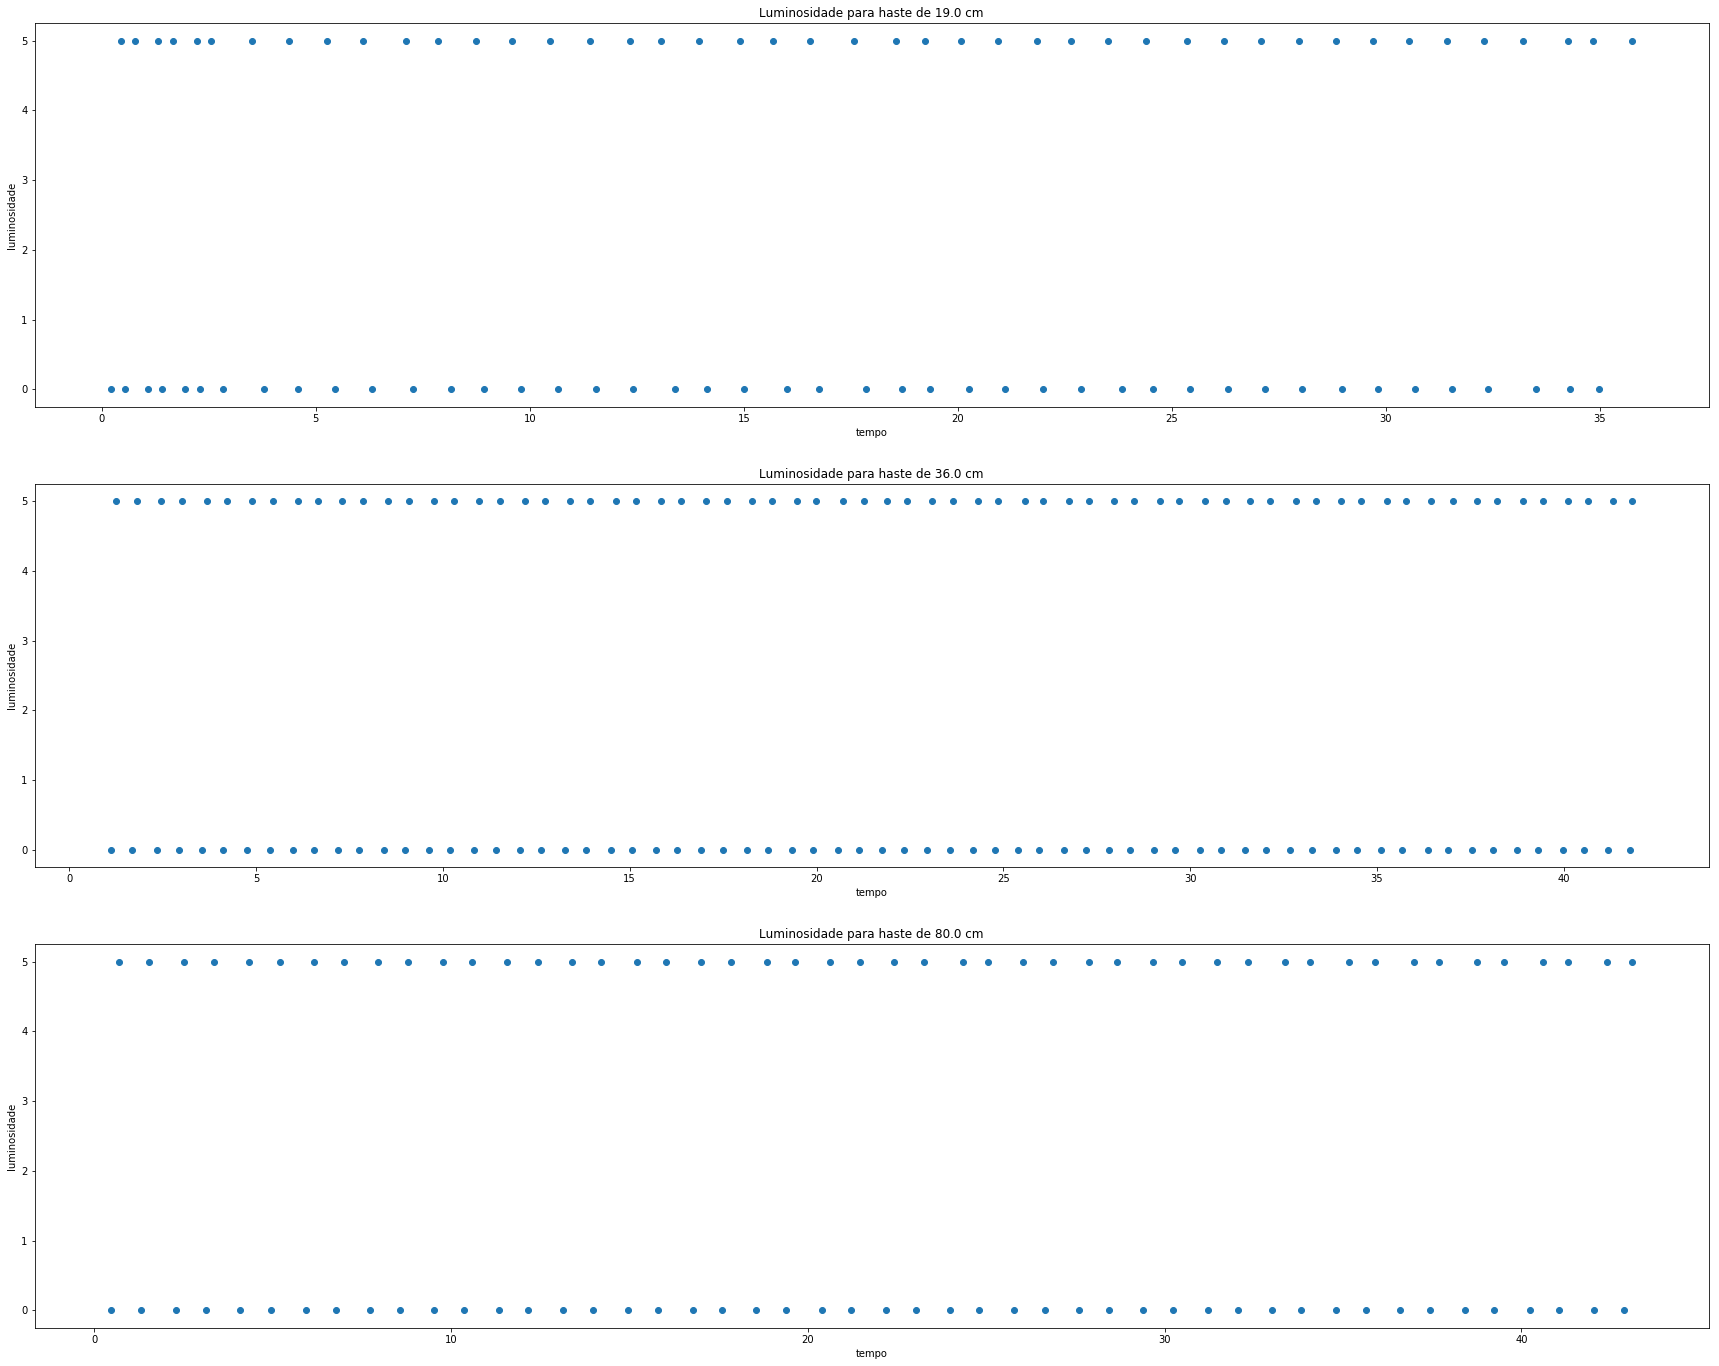

In [17]:
fig, vec = plt.subplots(NUM_FILES_P, figsize=(30, 24))
for i in range(NUM_FILES_P):
    vec[i].plot(np.array(data_p[i]['t (s)']), np.array(data_p[i]['Illuminance (lx)']), 'o')
    vec[i].set_title("Luminosidade para haste de %1.1f cm" % (lenghts_p[i]))
    vec[i].set_xlabel("tempo")
    vec[i].set_ylabel("luminosidade")
plt.show()

De forma similar, calculamos os períodos teóricos e amostrais para cada comprimento de haste.

In [50]:
periodos_teoricos_p = [None]*len(lenghts_p)
for i in range(len(lenghts_p)):
    periodos_teoricos_p[i] = 2*np.pi*np.sqrt((lenghts_p[i]/100)/g)
    print("Periodo teorico para a haste de %1.2f cm: %f segundos" %(l, periodos_teoricos_p[i]))

Periodo teorico para a haste de 80.00 cm: 0.874574 segundos
Periodo teorico para a haste de 80.00 cm: 1.203846 segundos
Periodo teorico para a haste de 80.00 cm: 1.794587 segundos


In [51]:
periodos_medios = [None]*NUM_FILES_P
for i in range(NUM_FILES_P):
    temp = data_p[i]['t (s)']
    periodos = [None]*(len(temp)-1)
    for j in range(len(temp)-1):
        periodos[j] = temp[j+1] - temp[j]
    if(i == 0): periodos_medios[i] = 2*np.mean(periodos)
    else: periodos_medios[i] = 4*np.mean(periodos)
    print("Periodo amostral para a haste de %1.2f cm: " %lenghts_p[i], periodos_medios[i])

Periodo amostral para a haste de 19.00 cm:  0.8172200465563216
Periodo amostral para a haste de 36.00 cm:  1.2069819873185186
Periodo amostral para a haste de 80.00 cm:  1.7959570933221052


Obs: segundo o realizador do experimento, para o pêndulo de comprimento $19$ cm o sensor marcou meios períodos, enquanto para os demais comprimentos marcou $\frac{1}{4}$ de período, por isso pequena diferença no cálculo.

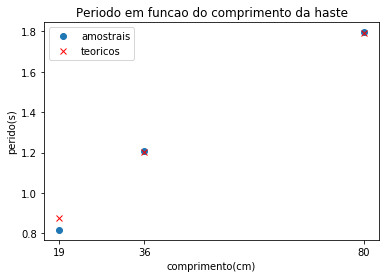

In [53]:
plt.plot(lenghts_p, periodos_medios, 'o', label='amostrais')
plt.plot(lenghts_p, periodos_teoricos_p, 'xr', label='teoricos')
plt.legend()
plt.title("Periodo em funcao do comprimento da haste")
plt.xticks(lenghts_p)
plt.xlabel("comprimento(cm)")
plt.ylabel("perido(s)")
plt.show()

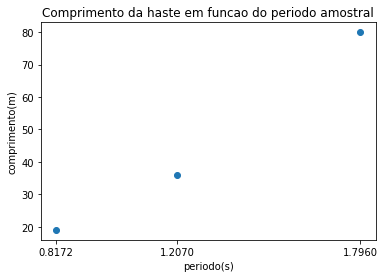

In [56]:
plt.plot(periodos_medios, lenghts_p,  'o')
plt.title("Comprimento da haste em funcao do periodo amostral")
plt.xticks(periodos_medios)
plt.xlabel("periodo(s)")
plt.ylabel("comprimento(m)")
plt.show()

Novamente vamos testar a relação $L = cT^2$ e estimar $c$ por mínimos quadrados, porém agora faremos uso dos dados deste novo experimento.

Lembramos que

$$\frac{\partial p}{\partial c} = 0 \iff c = \frac{ \sum_{i} {L_i}{T_i^2} }{\sum_{i} T_i^4 } $$



In [22]:
soma1 = 0
soma2 = 0
for i in range(NUM_FILES_P):
    soma1 += (periodos_medios[i]**2)*(lenghts_p[i]/100)
    soma2 += periodos_medios[i]**4
print("c = ", soma1/soma2)

c =  0.2491314786665265


Novamente podemos ver como $\hat{c}$ ficou próximo da real constante de proporcionalidade $\frac{g}{(2\pi)^2} \approx 0.248237$

Vamos supor agora que $L = cT^2 + b$. Novamente, vamos estimar $b$ e $c$ por mínimos quadrados. A função de perda agora é $p(b,c) = \sum_{i} (L_i - c{T_i}^2 - b)^2$. Calculando as derivadas parciais e igualando a zero, temos que $p$ é minimizada quando:

$$ c = \frac{ \sum_{i} (L_i - b){T_i}^2 }{ \sum_{i} T_i^4 }  $$ e $$ b = \frac{ \sum_{i} (L_i - c{T_i}^2 ) }{n} $$

o que nos leva a 

$$ b = {\Bigg( n - \frac{ (\sum_{i} T_i^2 )^2 }{ \sum_{i} T_i^4 } \Bigg)}^{-1} \Bigg( \sum_{i} L_i  - \frac{ (\sum_{i} L_i{T_i^2})(\sum_{i} T_i^2) }{ \sum_{i} T_i^4 } \Bigg) $$

Calculemos então $\hat{c}$ e $\hat{b}$.

In [24]:
def aproximacao_quadratica(periods, lengs):
    assert(len(periods) == len(lengs))
    periods = np.array(periods)
    lengs = np.array(lengs)
    soma_quadrados_ti = np.sum(np.square(periods))
    soma_quartas_ti = np.sum(np.square(np.square(periods)))
    soma_li = np.sum(lengs)
    soma_li_tiquadrado = np.sum(np.multiply(np.square(periods), lengs))
    n = len(periods)
    b = (soma_li - soma_li_tiquadrado*soma_quadrados_ti/soma_quartas_ti)/(n - soma_quadrados_ti*soma_quadrados_ti/soma_quartas_ti)
    soma = 0
    for i in range(n):
        soma += (lengs[i] - b)*(periods[i]**2)
    c = soma/soma_quartas_ti
    return [c,b]

In [25]:
c, b = aproximacao_quadratica(periodos_medios, np.array(lenghts_p)/100)
print("c = %f , b = %f" %(c,b))

c = 0.240233 , b = 0.021575


Nós também podemos usar os dados do Experimento 1, o que nos leva às estimativas:

In [26]:
c, b = aproximacao_quadratica(periodos_amostrais, np.array(lenghts)/100)
print("c = %f , b = %f" %(c,b))

c = 0.232122 , b = 0.073306


Note que tanto para a aproximação por $cT^2$ quanto por $cT^2 + b$ o valor estimado de $c$ ficou muito próximo do valor real $\frac{g}{(2\pi)^2} \approx 0.248237$.

Podemos também ajustar a curva a polinômios de graus $1$ e $2$, obtendo $p_1$ e $p_2$.

In [27]:
K = 2
poli = [None]*K
for i in range(K):
    poli[i] = np.polyfit(periodos_medios, np.array(lenghts_p)/100, i+1)
print("p_1(x) = %f*x + %f" %(poli[0][0], poli[0][1]))
print("p_2(x) = %f*x^2 + %f*x + %f" %(poli[1][0], poli[1][1], poli[1][2]))

p_1(x) = 0.633224*x + -0.356339
p_2(x) = 0.317651*x^2 + -0.206826*x + 0.146880


#### Análise dos erros

Novamente, faremos os procedimentos de teste de normalidade, construção de intervalos de confiança e testes de hipótese, desta vez com base nos dados obtidos pelo sensor de proximidade.

p-value =  5.557012218686389e-142
p-value =  0.8565553245963178
p-value =  8.040423192349574e-308


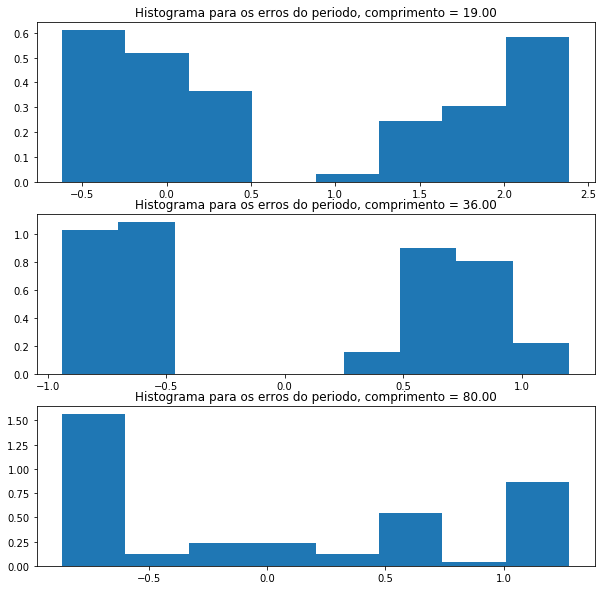

In [28]:
fig, vec = plt.subplots(NUM_FILES_P, figsize=(10, 10))
for i in range(NUM_FILES_P):
    temp = data_p[i]['t (s)']
    periodos = [None]*(len(temp)-1)
    for j in range(len(temp)-1):
        periodos[j] = temp[j+1] - temp[j]
    lis = 4*np.array(periodos)
    lis_mean = np.full(len(lis), 2*np.pi*np.sqrt((lenghts_p[i]/100)/g))
    vec[i].hist(lis-lis_mean, bins='auto', density=True)
    vec[i].set_title("Histograma para os erros do periodo, comprimento = %1.2f" %lenghts_p[i])
    print("p-value = ", scipy.stats.normaltest(lis-lis_mean)[1])

Neste caso, nenhum dos histogramas parece indicar normalidade dos erros. Porém o p-valor para o pêndulo de $36$ cm foi de $0.85$, o que não nós leva a rejeitar a hipótese de normalidade dos erros para este comprimento de haste. Para os outros dois comprimentos, pode ser que haja um viéis na medição ou que, de fato, a distribuição normal não seja a mais apropriada.

Faremos também os intervalos de confiança e testes de hipótese com nível de confiança $\alpha = 0.95$.

In [29]:
weights = [2, 4, 4]
for i in range(NUM_FILES_P):
    temp = data_p[i]['t (s)']
    periodos = [None]*(len(temp)-1)
    for j in range(len(temp)-1):
        periodos[j] = temp[j+1] - temp[j]
    print("Para o comprimento %1.2f" %lenghts_p[i])
    confidence(weights[i]*np.array(periodos), 2*np.pi*np.sqrt((lenghts_p[i]/100)/g) , 0.95)
    print("\n")

Para o comprimento 19.00
O intervalo de confianca 0.95 para mu é (0.702649, 0.931791)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 36.00
O intervalo de confianca 0.95 para mu é (1.077761, 1.336203)
Nao rejeitamos a hipotese H_0: mu_l = T_l


Para o comprimento 80.00
O intervalo de confianca 0.95 para mu é (1.629890, 1.962024)
Nao rejeitamos a hipotese H_0: mu_l = T_l




Podemos ver que, no caso do Experimento $2$, para nenhum dos comprimentos de haste os dados nós levaram a rejeitar a hipótese $\mu_L = T_L$. Para os três comprimentos o período teórico $T_L$ ficou dentro do intervalo de confiança construído.

#### Conclusão

Apesar de simples, podemos dizer que ambos os experimentos tiveram resultados satisfatórios. Com efeito, todos os períodos amostrais obtidos se encontram, a príncipio, próximos dos seus respectivos períodos teóricos. Na verdade, entre os $10$ comprimentos de haste diferentes, apenas para um deles, mais especificamente $116.5$cm, nós rejeitamos a hipótese $\mu_L = T_L$. Para todos os outros comprimentos os intervalos de confiança a nível $95\%$ contiveram o período teórico. Para os comprimentos do Experimento $1$, fizemos um teste de normalidade dos erros para o comprimento $109.5$cm, para o qual a hipótese de normalidade não foi rejeitada, com um p-valor de aproximadamente $0.8$. Fizemos o mesmo teste de normalidade para os três comprimentos do Experimento $2$, dos quais apenas os erros respectivos à haste de $36$cm não rejeitaram a hipótese de normalidade. Poderiamos estender a análise da distribuição dos erros com outros testes e outras distribuições, contudo, por ora, podemos dizer que o nosso objetivo principal, que era de estimar os períodos do pêndulo, a constante de proporcionalidade e a constante de aceleração da gravidade foram satisfeitos.